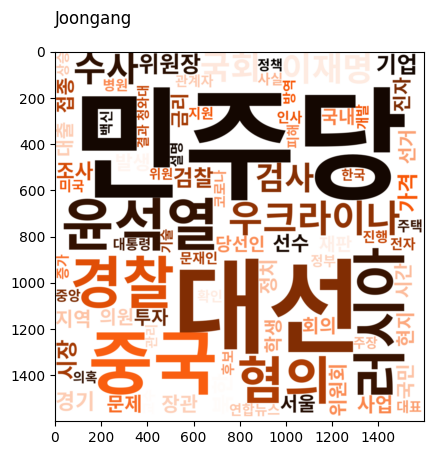

In [124]:
j = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/joogang/joogang_word.csv",sep="\t",encoding="utf-8")
j = j.drop(columns=['section'], axis=1)


stopword = ['대한', '당시', '기준', '때문', '한편', '작년', '상황', '사건','통해','관련','오전','이상','지난해','기자','경우', '생각', '모습', '인상', '이번', '스포츠조선', '이후', '올해', '관련', '자신', '우리', '통해', '사진', '라며', '인상', '사람', '지난', '위해', '남자', '여자', '지난','대해','위해','통해','오전','오후']
s=""
for i in stopword:
    s+=i
    s+="|"
datafilter = j["word"].str.contains(s[:-1])


j = j[~datafilter]
j = j.nlargest(n=100,columns='count',keep='first')
j = dict(zip(j['word'].tolist(), j['count'].tolist()))
wc_img = wc.generate_from_frequencies(j) #

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(20,95%%, %d%%)" % np.random.randint(1,100))   ## 색상코드/숫자를 조정해보세요
                                                            ## hsl 색상코드 참고
plt.title('Joongang', loc='left', pad=20)

plt.imshow(wc_img.recolor(color_func = grey_color_func),interpolation="bilinear")

wc_img.to_file('jj.jpg')



In [116]:
from collections import Counter

In [ ]:
tokenizer = Okt()
stop_words = ['위','첫','전','오늘','승','팀','최','골','시즌','리그','연속','감독','세계','것','강','명','최고','차','점','찬','더','등','호','황']
j["tokenized"] = j["word"].apply(str).apply(tokenizer.nouns)

In [110]:
j = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/joogang/joogang_word.csv",sep="\t",encoding="utf-8")

In [111]:
j = j.drop(columns=['section'], axis=1)

In [117]:
tokenizer = Okt()
stop_words = ['통해','오전','이상','지난해','대한','기자','경우', '생각', '모습', '인상', '이번', '스포츠조선', '이후', '올해', '관련', '보도', '자신', '우리', '통해', '사진', '라며', '인상', '사람', '지난', '위해', '남자', '여자', '지난','대해','위해','통해','연합뉴스','경우','오후','당시','상황','대한','지난해','올해','오전','진자','라며','' ,'위','첫','전','오늘','승','팀','최','골','시즌','리그','연속','감독','세계','것','강','명','최고','차','점','찬','더','등','호','황']
j["tokenized"] = j["word"].apply(str).apply(tokenizer.nouns)

In [115]:
j

,word,count
0,자신,7457
1,사회,9858
2,복지사,141
3,남편,2372
4,청원,1932
...,...,...
521732,활황,2
521733,디딤돌,1
521734,교두보,1
521735,쇼케이스,1


In [106]:
j = j.nlargest(n=100,columns='count',keep='first')

In [107]:
j = dict(zip(j['word'].tolist(), j['count'].tolist()))

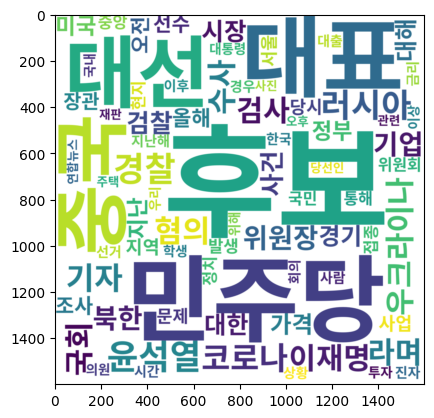

In [108]:
wc_img = wc.generate_from_frequencies(j) #
wc_img.to_file('j100.jpg')
plt.imshow(wc, interpolation = 'bilinear')
#이후, 오후, 대한, 라며, 연합뉴스, '오전', 지난해','이상'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

In [6]:
j = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/joongang_senti.csv",sep="\t",encoding="utf-8")

In [19]:
j['title'].dropna(inplace = True)

In [25]:
tokenizer = Okt()
stop_words = ['위','첫','전','오늘','승','팀','최','골','시즌','리그','연속','감독','세계','것','강','명','최고','차','점','찬','더','등','호','황']
j["tokenized"] = j["title"].apply(str).apply(tokenizer.nouns)
j['tokenized'] = j['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item) > 1])

In [67]:
j['section'] = j['section'].fillna('no')
j['title'] = j['section'].fillna('no')
j['date'] = j['section'].fillna('no')

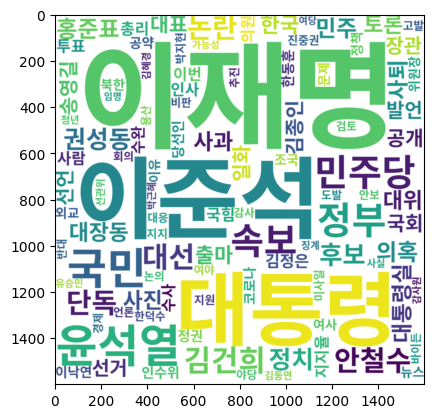

In [79]:
#정치 
j_pol = j[j['section'].str.contains('정치')] ####
j_pol[j_pol['section']=='title']['tokenized'].values
j_pol = np.hstack(j_pol[j_pol['section']=='정치']['tokenized'].values) ####
j_pol = Counter(j_pol)#
j_pol = j_pol.most_common(100)#
j_pol= dict(j_pol)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(j_pol) #
wc_img.to_file('j_pol.jpg')
plt.imshow(wc, interpolation = 'bilinear')


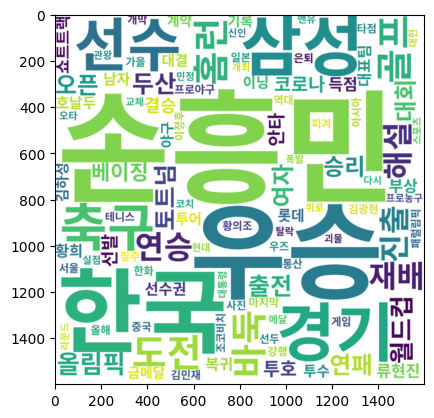

In [78]:
#스포츠,
j_spo = j[j['section'].str.contains('스포츠')] ####
j_spo[j_spo['section']=='title']['tokenized'].values
j_spo = np.hstack(j_spo[j_spo['section']=='스포츠']['tokenized'].values) ####
j_spo = Counter(j_spo)#
j_spo = j_spo.most_common(100)#
j_spo= dict(j_spo)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(j_spo) #
wc_img.to_file('j_spo.jpg')
plt.imshow(wc, interpolation = 'bilinear')

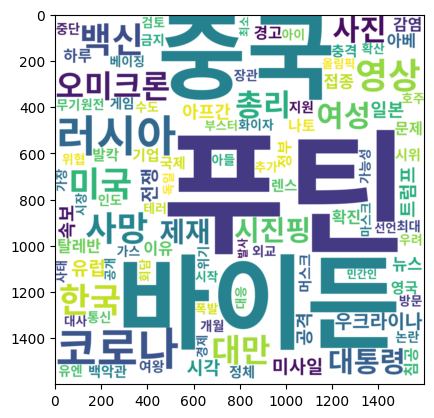

In [80]:
#국제,
j_int = j[j['section'].str.contains('국제')] ####
j_int[j_int['section']=='title']['tokenized'].values
j_int = np.hstack(j_int[j_int['section']=='국제']['tokenized'].values) ####
j_int = Counter(j_int)#
j_int = j_int.most_common(100)#
j_int= dict(j_int)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(j_int) #
wc_img.to_file('j_int.jpg')
plt.imshow(wc, interpolation = 'bilinear')

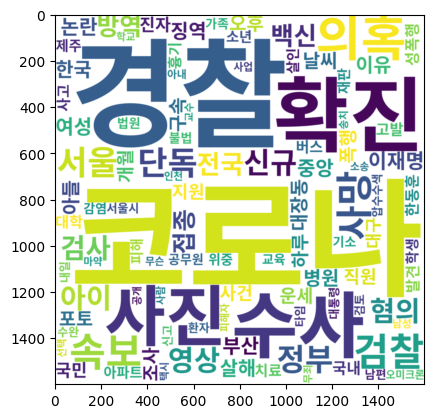

In [82]:
#사회

j_soc = j[j['section'].str.contains('사회')] ####
j_soc[j_soc['section']=='title']['tokenized'].values
j_soc = np.hstack(j_soc[j_soc['section']=='사회']['tokenized'].values) ####
j_soc = Counter(j_soc)#
j_soc = j_soc.most_common(100)#
j_soc = dict(j_soc)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(j_soc) #
wc_img.to_file('j_soc.jpg')
plt.imshow(wc, interpolation = 'bilinear')

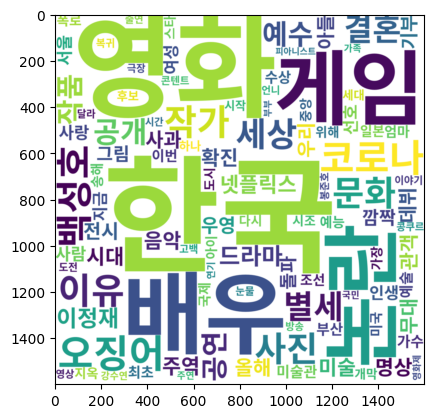

In [83]:
#문화 

j_cul = j[j['section'].str.contains('문화')] ####
j_cul[j_cul['section']=='title']['tokenized'].values
j_cul = np.hstack(j_cul[j_cul['section']=='문화']['tokenized'].values) ####
j_cul = Counter(j_cul)#
j_cul = j_cul.most_common(100)#
j_cul= dict(j_cul)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(j_cul) #
wc_img.to_file('j_cul.jpg')
plt.imshow(wc, interpolation = 'bilinear')

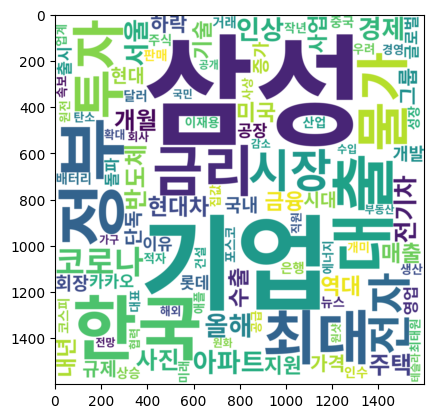

In [84]:
#경제
j_eco = j[j['section'].str.contains('경제')] ####
j_eco[j_eco['section']=='title']['tokenized'].values
j_eco = np.hstack(j_eco[j_eco['section']=='경제']['tokenized'].values) ####
j_eco = Counter(j_eco)#
j_eco = j_eco.most_common(100)#
j_eco= dict(j_eco)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(j_eco) #
wc_img.to_file('j_eco.jpg')
plt.imshow(wc, interpolation = 'bilinear')